<table width = 400 align="left" style="font-size:20px">
<tr>
    <td style="text-align:left"><b>Name 1</b></td>
    <td style="text-align:left">Monika Konduri</td>
</tr>
<tr>
    <td style="text-align:left"><b>Email</b></td>
    <td style="text-align:left">mkvdx@mst.edu</td> 
</tr>
<tr>
    <td style="text-align:left"><b>Name 2</b></td>
    <td style="text-align:left">Naga Harshitha Datla</td>
</tr>
<tr>
    <td style="text-align:left"><b>Email</b></td>
    <td style="text-align:left">nd4m7@mst.edu</td> 
</tr>
<tr>
    <td style="text-align:left"><b>Course:</b></td>
    <td style="text-align:left">CS 5402</td>
</tr>
<tr>
    <td style="text-align:left"><b>Project:</b></td>
    <td style="text-align:left">Sentiment Analysis on Twitter</td>
</tr>
<tr>
    <td style="text-align:left"><b>Date:</b></td>
    <td style="text-align:left">05-11-2022</td>
</tr>
</table>

## **Loading Libraries:**

In [11]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob
import tkinter as tk
#import TweetProcessModule as tpm
#import TwitterAPIInitializerModule as tim

## **Concept Description:**
To achieve a reflection of public sentiments by analysing the sentiments expressed in tweets and to develop a functional classifier for accurate and automatic sentiment classification of an unknown real time tweet stream using 3 classification techniques.

## **Data Collection:**

1. Visited the twitter developer site at dev.twitter.com.

2. Created an account on the developer site by clicking the ‘Sign In’ button at the top-right corner.
3. After sign-in, clicked on the developer link on the nav-bar.
Clicked on your account and choose “Apps” from the drop-down menu that appears
4. Clicked on the “create app” button and fill in the details for our application.
5. Created the access token for the application. Copied that access token into this file.
6. Later, the real-time data has been collected directly from Twitter using Consumer Key, Consumer Secret, OAuth Access Token, OAuth Access Token Secret from the OAuth settings of our account.



<!-- The real-time data has been collected directly from Twitter using keys and tokens as mentioned below.

consumer_key = '8hEcbFXKZwPADtWnnds5A3Xgg'

consumer_secret = 's6L7XaN52xPBzGQHJDAYIhK8EiMirqGS4KBmNGZ3YEDqw76SZk'

access_token = '2529158863-dfXjUwnZuCgNxZT2uyBOD3vcFqM1Dy8FbfROjZJ'

access_token_secret = 'bbEZnGbYpcS5eLqA4jvEgLRQyPXSPReADF3MfWlV22D3r' -->

## **Example Description**
user_id:- User_id is an ID given to differentiate a twitter user from other twitter users  which is a nominal attribute.

tweet:- Tweet is the comment that is mentioned by the twitter user which is a nominal attribute.


## **Modules Description:**
1.	Tweet Initializer Module
2.	Tweet Process Module
3.	Interface Module




## **Tweet Initializer Module:**
This module is used to authorize Twitter API using four keys which are declared as variables. Twitter API is used in order to access Twitter database.

In [12]:
#TwitterAPI Initialization Module
class TwitterClient(object):
    def __init__(self):
        '''Class constructor or initialization method.'''
        # keys and tokens from the Twitter Dev Console
        consumer_key = '8hEcbFXKZwPADtWnnds5A3Xgg'
        consumer_secret = 's6L7XaN52xPBzGQHJDAYIhK8EiMirqGS4KBmNGZ3YEDqw76SZk'
        access_token = '2529158863-dfXjUwnZuCgNxZT2uyBOD3vcFqM1Dy8FbfROjZJ'
        access_token_secret = 'bbEZnGbYpcS5eLqA4jvEgLRQyPXSPReADF3MfWlV22D3r'
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed") 
    
    

 
## **Tweet Process Module:**
This module is used for fetching the tweets by using the keys from Tweet Initializer Module, preprocessing the tweets and apply sentiment classification on the data.

In [13]:
#Process Tweet Module
class TweetHandler:
    def get_tweets(self,api, query, count = 10):
        # empty list to store parsed tweets
        tweets = []
        try:
            # call twitter api to fetch tweets
            fetched_tweets = api.api.search(q = query, count = count)
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
                    # return parsed tweets
            return tweets
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

    def clean_tweet(self, tweet):
        '''Utility function to clean tweet text by removing links, special characters using simple regex statements.'''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    
    def get_tweet_sentiment(self, tweet):
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
    

In [14]:
#Process Tweet Module
class TweetHandler1:
    def get_tweets(self,api, query, count = 10):
        # empty list to store parsed tweets
        tweets = []
        try:
            # call twitter api to fetch tweets
            fetched_tweets = api.api.search(q = query, count = count)
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
                # appending parsed tweet to tweets list
                
            return tweets
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

    def clean_tweet(self, tweet):
        '''Utility function to clean tweet text by removing links, special characters using simple regex statements.'''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    
    def get_tweet_sentiment(self, tweet):
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

## **Exploratory Analysis and mining:**
**Sentiment analysis** is used to check whether the sentiments of a word or sentences are positive, negative or neutral.

**TextBlob** is a Natural Language Processing Python library (NLP).
Natural Language ToolKit (NLTK) was used extensively by TextBlob to complete its objectives.
NLTK is a library that allows users to deal with categorization, classification, and a variety of other tasks by providing simple access to a large number of lexical resources.
TextBlob is a basic package that allows for extensive textual data analysis and processing.
A sentiment is determined by its semantic direction and the intensity of each word in the phrase in lexicon-based techniques.
The polarity and subjectivity of a statement are returned by TextBlob.
The range of polarity is [-1,1], with -1 indicating a negative feeling and 1 indicating a positive sentiment.

**A bag of words** is a text representation that defines where words appear in a document.

## **Interface Module**
This module is used to create an interface which displays the result i.e., percentage of positive,negative and neutral tweets. 

Positive Tweets:
25
Negative Tweets:
7
Neutral Tweets:
66
Few Positive Tweets:
[{'text': 'RT @jsuhsource: 220512 - stylecollective instagram update\n\n"Johnny Suh looked stunning at the 2022 Met Gala 💚"\n\n🔗 https://t.co/8O3NAfbbPB…', 'sentiment': 'positive'}, {'text': 'ok where was THIS at the met gala?? https://t.co/JhgUOHitip', 'sentiment': 'positive'}, {'text': '@TheRealALM I mean if u saw the fits at the met gala this is way better', 'sentiment': 'positive'}, {'text': 'RT @209_archive: 220512 E! Style Collective instagram update\n\n“Johnny Suh looked stunning at the 2022 Met Gala 💚”\n\nhttps://t.co/L0E9BA9iln…', 'sentiment': 'positive'}, {'text': 'RT @GigiHadidInfos: Gigi Hadid, Bella Hadid and Donatella Versace at the 2022 Met Gala in New York. Photographed by Cole Sprouse. https://t…', 'sentiment': 'positive'}, {'text': 'RT @_psychostardust: Another thing I posted on discord and thought I might as well share here. This was honestly just a feel good doodle be…', 'sentiment': 'pos

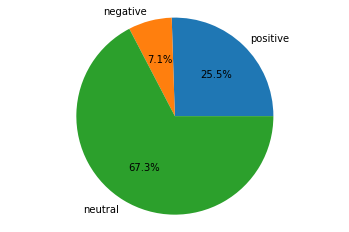

In [18]:
#User Inter Face module
import matplotlib.pyplot as plt
def startProcess():
    api = TwitterClient()
    pro = TweetHandler()
    keyword = 'met gala'
    tweets = pro.get_tweets(api,query =keyword , count = 200)
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    ptweetsc = str(int(100*len(ptweets)/len(tweets)))
    ntweetsc = str(int(100*len(ntweets)/len(tweets)))
    neutweetc = str(int(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))
    print('Positive Tweets:')
    print(ptweetsc)
    print('Negative Tweets:')
    print(ntweetsc)
    print('Neutral Tweets:')
    print(neutweetc)
    print('Few Positive Tweets:')
    print(ptweets)
    print('Few Negative Tweets:')
    print(ntweets)
    print('piechart')
    s='positive','negative','neutral'
    c= [ptweetsc,ntweetsc,neutweetc]
    plt.pie(c,labels=s,autopct='%1.1f%%')
    #fig1, ax1 = plt.subplots()
    #ax1.pie(c,labels=s,autopct="%1.1%%f")
    plt.axis('equal')  
    plt.show()  
    
    
  

startProcess()
      


## **Results:**

Using sentimental analysis we determine the postive, negative and neutral tweets tweeted based on the keyword provided. 



For keyword : 'met gala'
Positive Tweets:
16
Negative Tweets:
4
Neutral Tweets:
78
